4.1. Consider the music genre data set described in Sect. 1.4. The objective
for these data is to use the predictors to classify music samples into the
appropriate music genre.
- (a) What data splitting method(s) would you use for these data? Explain.
- (b) Using tools described in this chapter, provide code for implementing your
approach(es).

References Link:

http://tunedit.org/challenge/music-retrieval/genres
http://tunedit.org/download/ISMIS/challenges/music-retrieval/public/genresTrain.csv
http://tunedit.org/download/ISMIS/challenges/music-retrieval/public/genresTest.csv

In [2]:
library(tidyverse)
library(data.table)
trn <- read_csv("genresTrain.csv")
head(trn)
nrow(trn)/ncol(trn)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.5
√ tibble  1.4.2     √ dplyr   0.7.5
√ tidyr   0.8.1     √ stringr 1.3.1
√ readr   1.1.1     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

Parsed with column specification:
cols(
  .default = col_double(),
  GENRE = col_character()
)
See spec(...) for full column specifications.


PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.0020317,0.041056,9.0700e-05,0.049627,0.00023123,0.0112650,2.4068e-05,0.0021769,2.7965e-06,Pop
2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.0059592,0.082830,1.1221e-03,0.093622,0.00386910,0.0314670,7.7900e-04,0.0067156,4.0732e-05,Blues
2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.0027664,0.043652,3.5815e-04,0.045415,0.00021138,0.0138500,3.7983e-05,0.0030694,1.8371e-06,Pop
2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.0025034,0.045159,3.5586e-04,0.037388,0.00011800,0.0118970,4.4980e-05,0.0026449,5.6050e-06,Jazz
2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.0027029,0.047347,3.0155e-04,0.049469,0.00060605,0.0140520,1.5194e-04,0.0032435,2.9119e-05,Jazz
2.7737,447.09,8531.9,-0.16128,-0.15742,-0.15769,-0.14861,-0.138120,-0.12762,-0.12145,...,0.0019773,0.023864,1.4097e-05,0.021595,0.00022824,0.0075048,7.2913e-05,0.0018830,6.6686e-06,Classical


[1] 65.07812

In [2]:
any(is.na(trn))
# no missing value for this dataset
# na_info <- unlist(lapply(trn,function(x) any(is.na(x))))
# na_info <- names(na_info)[na_info]
# head(na_info)

[1] FALSE

Warning message in barchart.table(table(x), data, ...):
"explicit 'data' specification ignored"

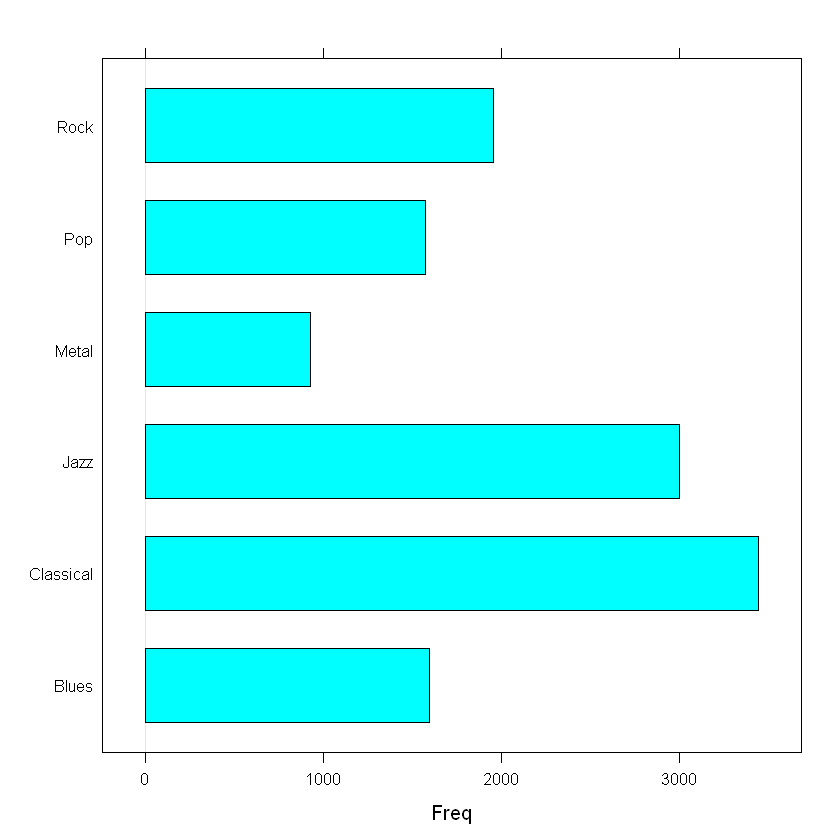

In [3]:
#let's see how genre distribute
library(lattice)
barchart(trn$GENRE,data=trn)
#histogram(~GENRE,data=trn)

In [4]:
library(sampling)
trn$GENRE <- as.factor(trn$GENRE)
trn <- trn[order(trn$GENRE),]
trn_id <- strata(trn,stratanames = c("GENRE"),size=c(1277,2755,2402,739,1260,1562),method = "srswor")

trn_set <- trn[trn_id$ID_unit,]
test_set <- trn[-trn_id$ID_unit,]

Warning message in barchart.table(table(x), data, ...):
"explicit 'data' specification ignored"

Warning message in barchart.table(table(x), data, ...):
"explicit 'data' specification ignored"

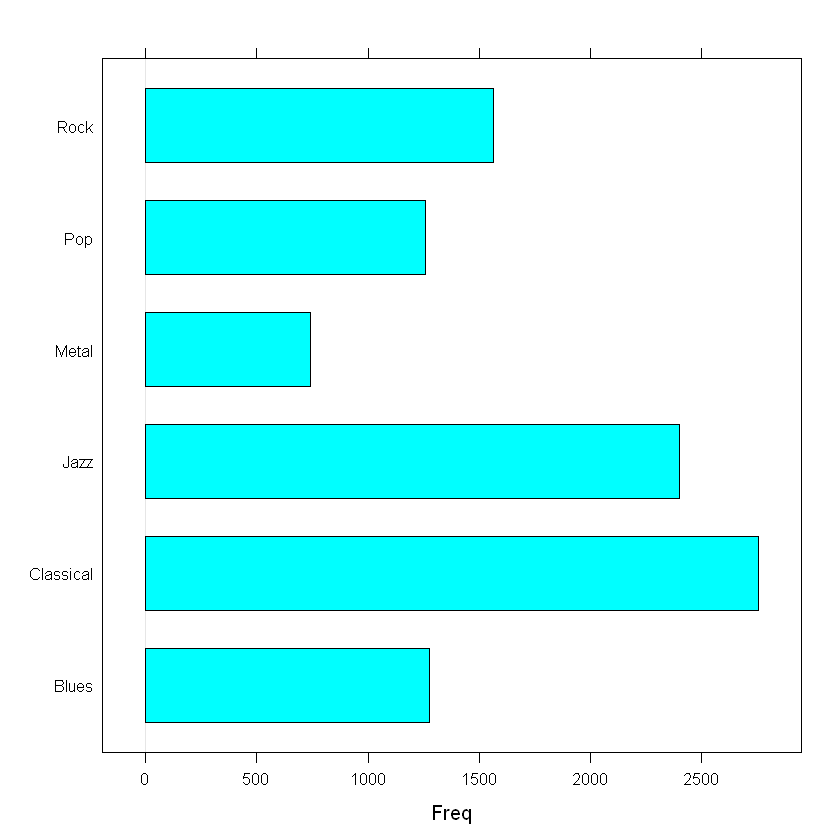

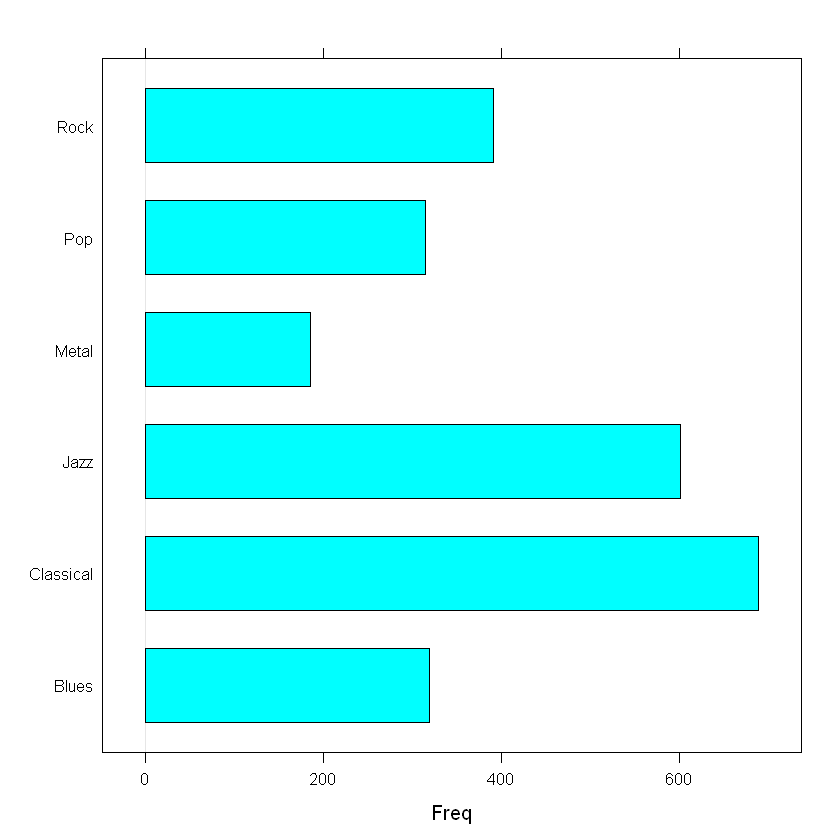

In [5]:
barchart(trn_set$GENRE,data=trn_set)
barchart(test_set$GENRE,data=test_set)

In [16]:
library(caret)
set.seed(31)
tenFoldCV <- createFolds(trn$GENRE, k = 10,returnTrain = T)

In [19]:
str(tenFoldCV$Fold01)

 int [1:11244] 1 2 3 4 5 7 8 9 10 12 ...


In [20]:
fld_1 <- trn[tenFoldCV$Fold01,]

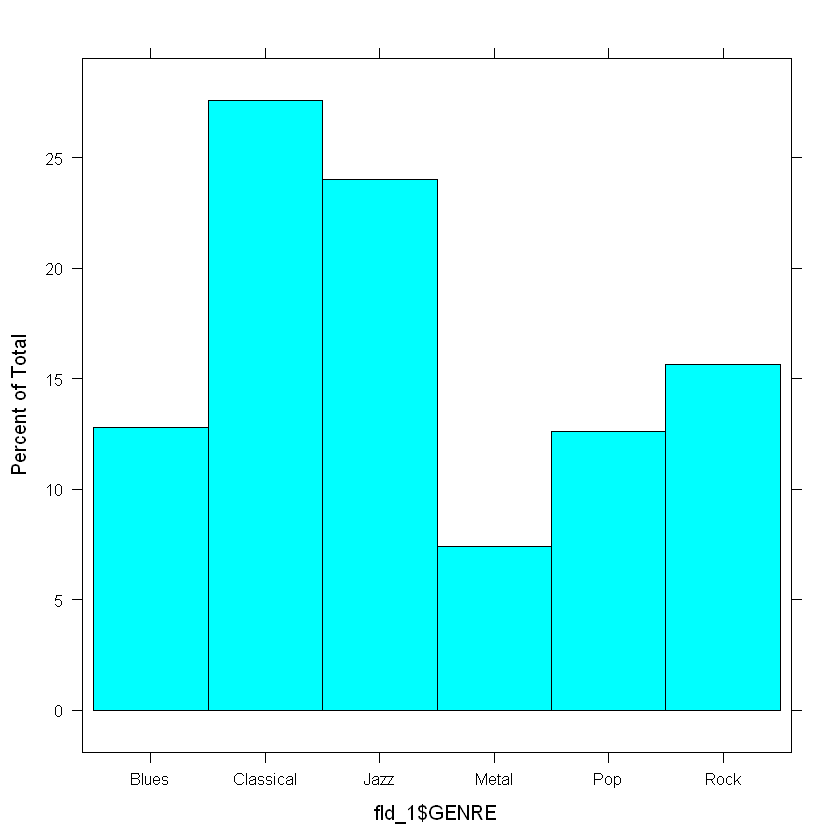

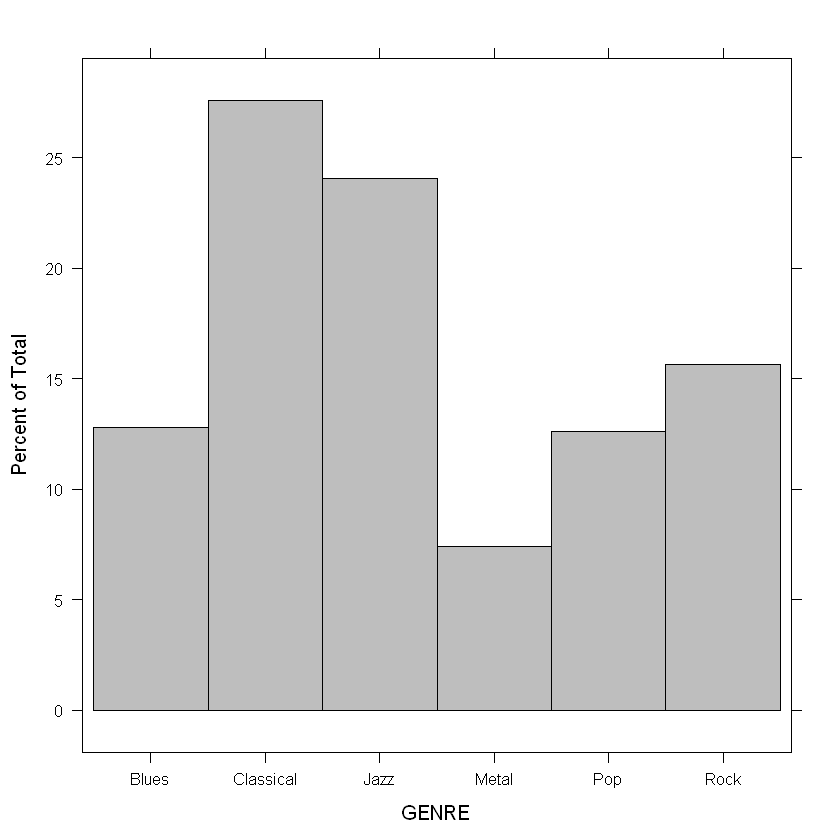

In [25]:
histogram(~fld_1$GENRE,data=fld_1)
histogram(~GENRE,data=trn,col="grey")

4.2. Consider the permeability data set described in Section Sect. 1.4. The objective for this data is to
use the predictors to model compounds’ permeability.

- (a) What data splitting method(s) would you use for this data? Explain.
- (b) Using tools described in this chapter, provide code for implementing your approach(es).

 num [1:165, 1] 12.52 1.12 19.41 1.73 1.68 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:165] "1" "2" "3" "4" ...
  ..$ : chr "permeability"


[1] 0.1490515

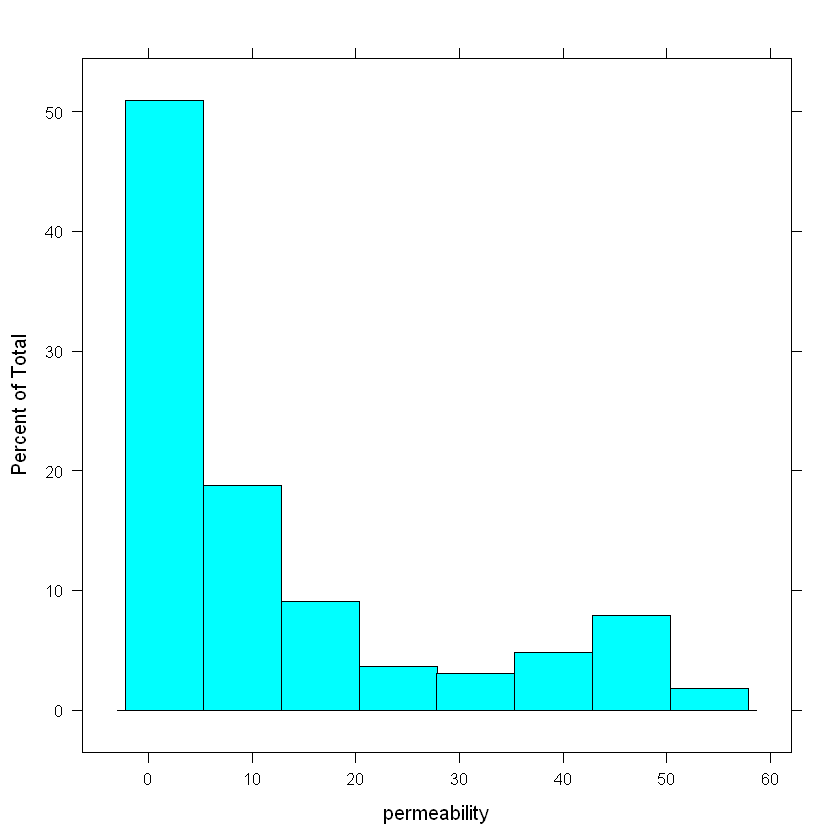

In [6]:
library(AppliedPredictiveModeling)
data(permeability)
str(permeability)
nrow(fingerprints)/ncol(fingerprints)
histogram(~permeability)

In [8]:
set.seed(72)
library(caret)
repeatedCV <- createMultiFolds(permeability,k=10,times = 25)

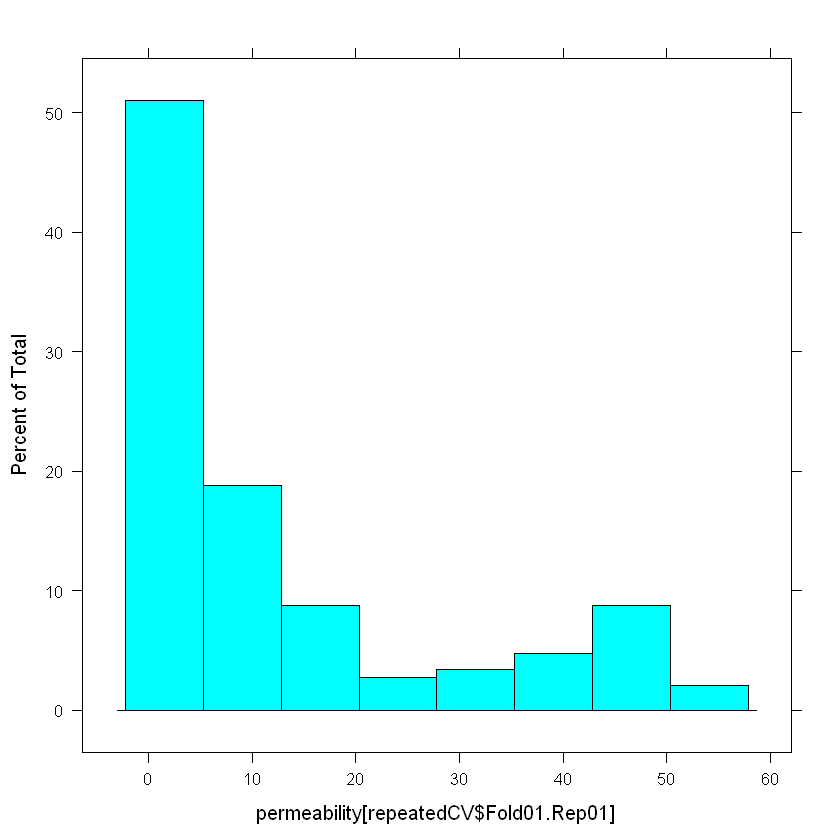

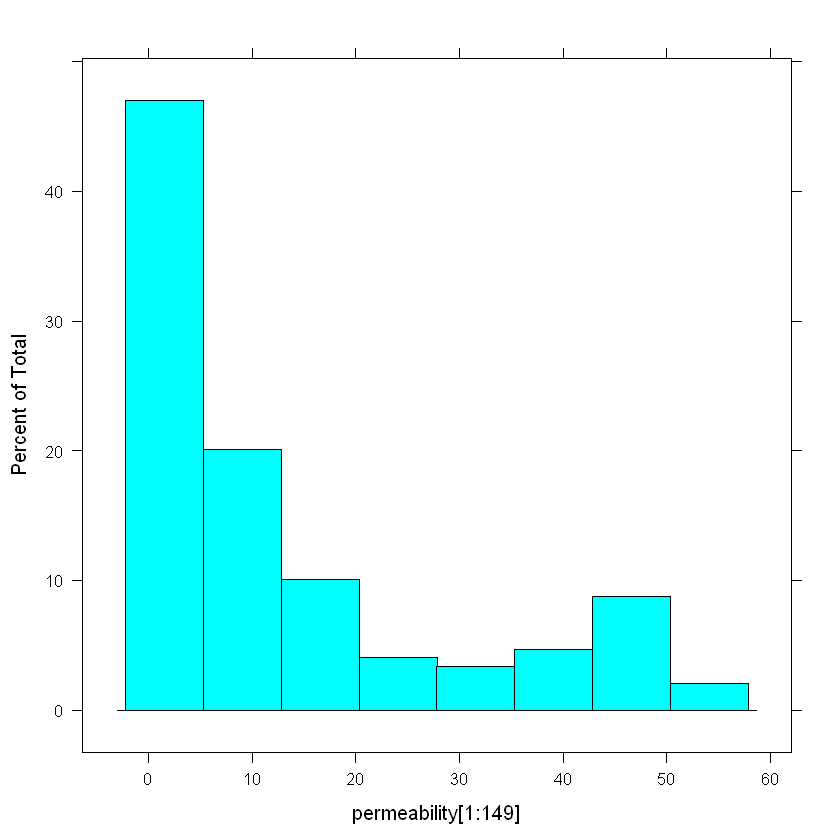

In [18]:
histogram(~permeability[repeatedCV$Fold01.Rep01])

4.3. Partial least squares (Sect. 6.3) was used to model the yield of a chemical
manufacturing process (Sect. 1.4). The data can be found in the AppliedPredictiveModeling package and can be loaded using
```r
library(AppliedPredictiveModeling)
data(ChemicalManufacturingProcess)
```
The objective of this analysis is to find the number of PLS components
that yields the optimal R2 value (Sect. 5.1). PLS models with 1 through 10
components were each evaluated using five repeats of 10-fold cross-validation
and the results are presented in the following table:
- (a) Using the “one-standard error”method, what number of PLS components
provides the most parsimonious model?
- (b) Compute the tolerance values for this example. If a 10 % loss in R2 is
acceptable, then what is the optimal number of PLS components?
- (c) Several other models (discussed in Part II) with varying degrees of complexity were trained and tuned and the results are presented in Fig. 4.13.
If the goal is to select the model that optimizes R2, then which model(s)
would you choose, and why?
- (d) Prediction time, as well as model complexity (Sect. 4.8) are other factors
to consider when selecting the optimal model(s). Given each model’s prediction time, model comp

In [26]:
library(AppliedPredictiveModeling)
data(ChemicalManufacturingProcess)
head(ChemicalManufacturingProcess)

Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
38.00,6.25,49.58,56.97,12.74,19.51,43.73,100,16.66,11.44,...,0.019,0.5,3,7.2,NA,NA,11.6,3.0,1.8,2.4
42.44,8.01,60.97,67.48,14.65,19.36,53.14,100,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
42.03,8.01,60.97,67.48,14.65,19.36,53.14,100,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
41.42,8.01,60.97,67.48,14.65,19.36,53.14,100,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
42.49,7.47,63.33,72.25,14.02,17.91,54.66,100,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1
43.57,6.12,58.36,65.31,15.17,21.79,51.23,100,18.30,12.13,...,0.018,0.4,2,7.2,0.0,0.00,11.5,2.2,1.8,2.0


In [78]:
any(is.na(ChemicalManufacturingProcess))

na_info <- unlist(lapply(ChemicalManufacturingProcess,function(x) any(is.na(x))))
#na_info <- names(na_info)[na_info]
#head(na_info)

[1] TRUE

[1] "ManufacturingProcess01" "ManufacturingProcess02" "ManufacturingProcess03"
[4] "ManufacturingProcess04" "ManufacturingProcess05" "ManufacturingProcess06"

In [86]:
CMP <- ChemicalManufacturingProcess[,!na_info]

In [87]:
set.seed(19711230)
fit_pls <- train(Yield ~ .,data = CMP,method = "pls",
                 preProc = c("center", "scale"),tuneLength = 10,
                 trControl = trainControl(method = "repeatedcv", repeats = 5))

In [103]:
R2values <- fit_pls$results[,c("ncomp","Rsquared","RsquaredSD")]
R2values$RsquaredSEM <- R2values$RsquaredSD/sqrt(length(fit_pls$control$index))
R2values

ncomp,Rsquared,RsquaredSD,RsquaredSEM
1,0.3977156,0.1998676,0.02826555
2,0.5081880,0.2189638,0.03096616
3,0.5667223,0.1894780,0.02679623
4,0.5523224,0.2000750,0.02829487
5,0.5376299,0.2190161,0.03097356
6,0.5225713,0.2330304,0.03295547
7,0.5104416,0.2457468,0.03475384
8,0.5089982,0.2472731,0.03496970
9,0.5124249,0.2428281,0.03434107
10,0.5101823,0.2440854,0.03451889
